# El modelo de **Izhikevich**

In [ ]:
# Librerías
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [ ]:
# Euler
def euler(f,x,t,h,p=0):
  if callable(x)==True:
    return x(t)+f(x(t),t,p)*h
  else:
    return x+f(x,t,p)*h

# Integrador
def integrador_ode(m, f, x_0, a, b, k, p=0, c=lambda x,t,p: x):
  w = np.zeros((k+1,len(x_0)))
  t = np.zeros(k+1)
  w[0,:] = x_0
  t[0] = a
  h = (b-a)/k
  for j in range(1,k+1):
    t[j] = a + j*h
    w[j,:] = m(f,w[j-1,:],t[j-1],h,p)
    w[j,:] = c(w[j,:],t[j-1],p)
  return t,w

#RK4 (Runge-Kutta)
def RK4(f,x,t,h,p=0):
  k1 = f(x,t,p)
  k2 = f(x+h*k1/2,t+h/2,p)
  k3 = f(x+h*k2/2,t+h/2,p)
  k4 = f(x+h*k3,t+h,p)
  return x+h/6*(k1+2*k2+2*k3+k4)

El modelo de Izhikevich (ref. 1.) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ref. 2. y premio Nobel en Fisiología y Medicina de 1963) para describir el comportamiento del potencial de disparo de una neurona.

El modelo de Izhikevich se describe en términos de la siguiente ODE bidimensional y de primer orden

\begin{eqnarray}
v'(t) &=& gv^2(t) + qv(t) + w - u(t) + I(t) \\
u'(t) &=& a(bv(t)-u(t))
\end{eqnarray}

unida a la siguiente condición de *reseteo*

\begin{eqnarray}
v(t) &\leftarrow& c \\
u(t) &\leftarrow& u(t) + d \\
\end{eqnarray}

la cuál se impone cuando la condición $v(t)\geq s$ se cumple.

En todas estas ecuaciones, $a$, $b$, $c$, $d$, $g$, $q$, $w$ y $s$ son parámetros del modelo.

Además, se considera la función dependiente del tiempo $I:\mathbb{R}\ni t\to I(t)\in \mathbb{R}$, la cual representa una corriente de entrada que excita a la neurona.

Referencias:

1. Eugene M. Izhikevich, Simple Model of Spiking Neurons, IEEE TRANSACTIONS ON NEURAL NETWORKS, VOL. 14, NO. 6, P. 1569, NOVEMBER 2003
2. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

**1)** Integre el modelo de Izhikevich usando el método RK4 en el intérvalo de tiempo

* $t\in [0,10]$

Considere, para ello, la siguiente elección de valores de los parámetros

* $g=0.04$

* $q=5$

* $w=150$

* $a=0.02$

* $b=0.2$

* $c=-65$

* $d=2$

* $s=30$

una corriente de entrada

\begin{eqnarray}
I(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 10 \\
10 & c.c.
\end{array}
\right.
\end{eqnarray}

y la condición inicial

* $v(0) = -70$

* $u(0) = bv(0)$

Además, utilice el paso de integración

$h=0.1$

**2)** Grafique la solución.

**3)** Reproduzca, aproximadamente, los últimos 8 paneles de la figura 2 del paper en la referencia 1.

Para ello, tenga en cuenta la siguiente tabla confeccionada a partir de la información en la figura 2 del paper

$$
\begin{aligned}
& \text {Tabla 1. Parmaterización por caso. }\\
&\begin{array}{ccccc}
\hline \hline
\text { Caso } & a & b & c & d & I \\
\hline
\text { RS }  & 0.02 & 0.2  & -65 & 8    & I_1 \\
\text { IB }  & 0.02 & 0.2  & -55 & 4    & I_1 \\
\text { CH }  & 0.02 & 0.2  & -50 & 2    & I_1 \\
\text { FS }  & 0.1  & 0.2  & -65 & 2    & I_1 \\
\text { TC1 } & 0.02 & 0.25 & -65 & 0.05 & I_2 \\
\text { TC2 } & 0.02 & 0.25 & -65 & 0.05 & I_3 \\
\text { RZ }  & 0.1  & 0.25 & -65 & 2    & I_4 \\
\text { LTS } & 0.02 & 0.25 & -65 & 2    & I_1 \\
\hline
\end{array}
\end{aligned}
$$

donde

\begin{eqnarray}
I_1(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 25 \\
10 & c.c.
\end{array}
\right. \\
I_2(t)
&=&
\left\{
\begin{array}{ll}
0  & t < 150 \\
2.5 & c.c.
\end{array}
\right. \\
I_3(t)
&=&
\left\{
\begin{array}{ll}
-15  & t < 100 \\
0 & c.c.
\end{array}
\right. \\
I_4(t)
&=&
\left\{
\begin{array}{ll}
0    & t < 10 \\
.165 & 10 \leq t < 100 \\
10   & 100 \leq t < 105 \\
.165 & c.c.
\end{array}
\right.
\end{eqnarray}

¡Usar la tabla como guía nomás!

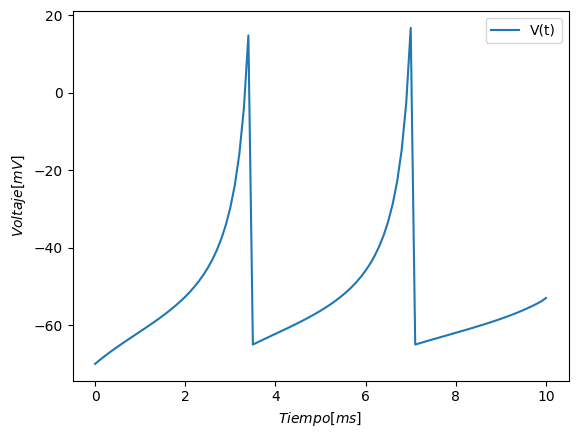

In [ ]:
# 1) y 2)
# ODE
def func(x,t,p): #p = [g, q, w, a, b, c, d, s], x = [v, u]
  return np.array([p[0]*x[0]**2+p[1]*x[0]+p[2]-x[1]+I(t), p[3]*(p[4]*x[0]-x[1])])

# Condición de reseteo
def c(x,t,p):
  if x[0]>=p[7]:
    return np.array([p[5],x[1]+p[6]])
  else:
    return x

# Corriente
def I(t):
  if t < 10:
    return 0
  else:
    return 10

p = [0.04, 5, 150, 0.02, 0.2, -65, 2, 30]
v0 = -70
u0 = p[4]*v0
t, w = integrador_ode(RK4, f=func, x_0=np.array([v0,u0]), a=0, b=10, k=100, p=p, c=c) #h=0.1 entonces k=(10-0)/0.1
plt.plot(t,w[:,0], label='V(t)')
plt.xlabel('$Tiempo[ms]$')
plt.ylabel('$Voltaje[mV]$')
plt.legend()
plt.show()

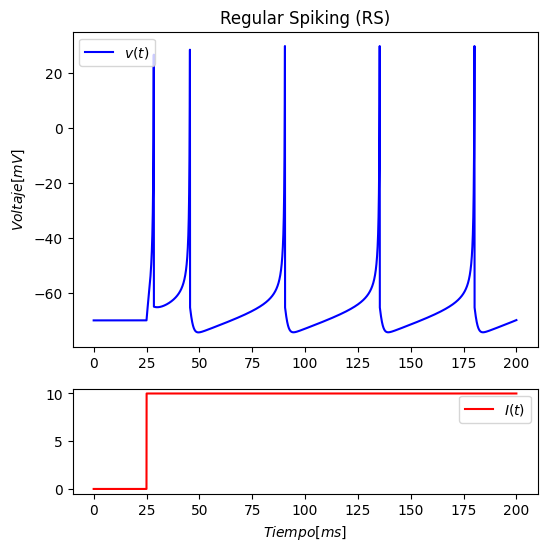

In [ ]:
# 3) RS
# Corriente
def I(t):
  if t < 25:
    return 0
  else:
    return 10

# Parametros
p = [0.04, 5, 140, 0.02, 0.2, -65, 8, 30] #notar que cambié w de 150 a 140!
v0 = -70
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Regular Spiking (RS)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

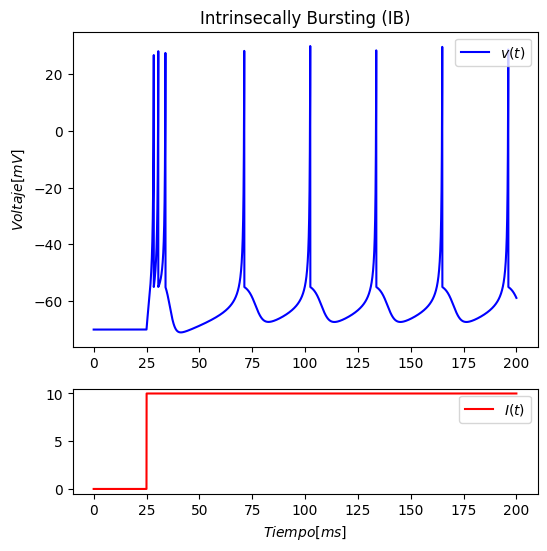

In [ ]:
# 3) IB
# Corriente
def I(t):
  if t < 25:
    return 0
  else:
    return 10

# Parametros
p = [0.04, 5, 140, 0.02, 0.2, -55, 4, 30]
v0 = -70
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                              gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Intrinsecally Bursting (IB)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

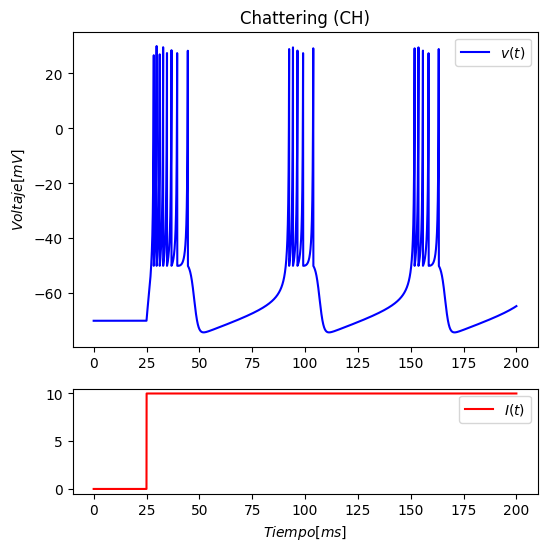

In [ ]:
# 3) CH
# Corriente
def I(t):
  if t < 25:
    return 0
  else:
    return 10

# Parametros
p = [0.04, 5, 140, 0.02, 0.2, -50, 2, 30]
v0 = -70
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t, w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Chattering (CH)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t, np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

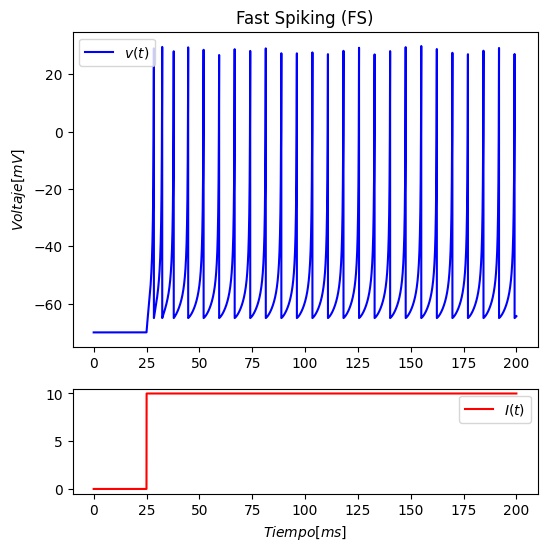

In [ ]:
# 2.3) FS
#Corriente
def I(t):
  if t < 25:
    return 0
  else:
    return 10

#parametros
p = [0.04, 5, 140, 0.1, 0.2, -65, 2, 30]
v0 = -70
u0 = p[4]*v0

#integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                              gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Fast Spiking (FS)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

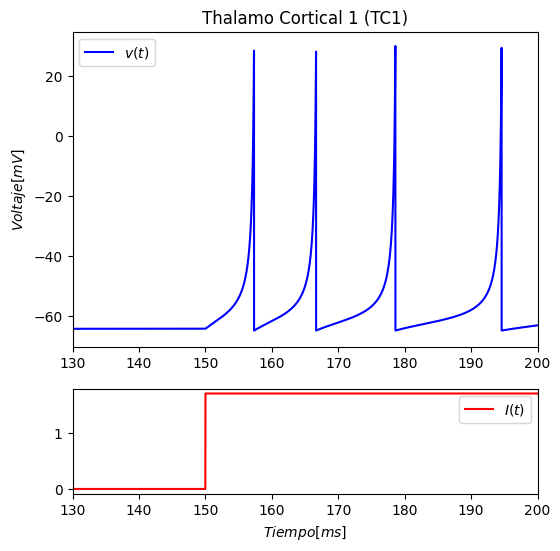

In [ ]:
# 2.3) TC1
# Corriente
def I(t):
  if t < 150:
    return 0
  else:
    return 1.7

# Parametros
p = [0.04, 5, 140, 0.02, 0.25, -65, 0.05, 30]
v0 = -63
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Thalamo Cortical 1 (TC1)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.set_xlim(130,200)
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.set_xlim(130,200)
ax2.legend()

plt.show()

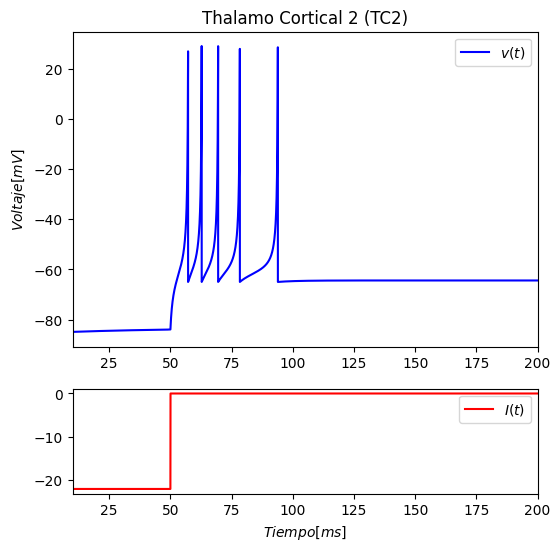

In [ ]:
# 3) TC2
# Corriente
def I(t):
  if t < 50:
    return -22
  else:
    return 0

# Parametros
p = [0.04, 5, 140, 0.02, 0.25, -65, 0.05, 30]
v0 = -70
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Thalamo Cortical 2 (TC2)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.set_xlim(10,200)
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.set_xlim(10,200)
ax2.legend()

plt.show()

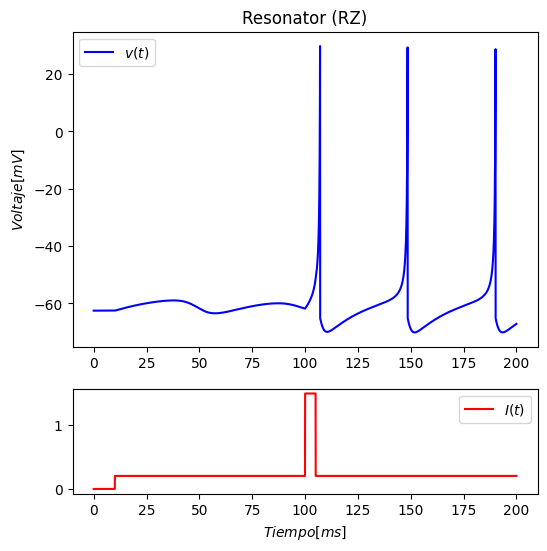

In [ ]:
# 3) RZ
# Corriente
def I(t):
  if t<10:
    return 0
  elif t>=10 and t<100:
    return 0.205
  elif t>=100 and t<105:
    return 1.5
  else:
    return 0.205

# Parametros
p = [0.04, 5, 140, 0.1, 0.26, -65, 2, 30]
v0 = -62.5
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Resonator (RZ)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

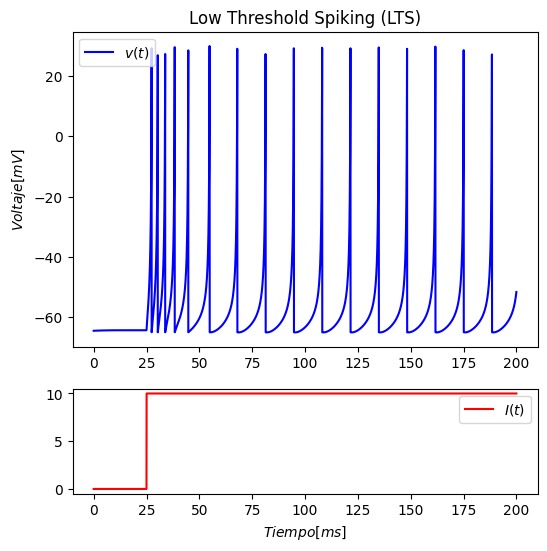

In [ ]:
# 3) LTS
# Corriente
def I(t):
  if t<25:
    return 0
  else:
    return 10

# Parametros
p = [0.04, 5, 140, 0.02, 0.25, -65, 2, 30]
v0 = -64.5
u0 = p[4]*v0

# Integrador
t,w = integrador_ode(RK4, f=func, x_0=np.array([v0, u0]), a=0, b=200, k=20000, p=p, c=c)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6),
                               gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(t,w[:,0], label="$v(t)$", linestyle="-",c="blue")
ax1.set_title("Low Threshold Spiking (LTS)")
ax1.set_ylabel('$Voltaje[mV]$')
ax1.legend()

ax2.plot(t,np.vectorize(I, otypes=[float])(t), label="$I(t)$", linestyle="-", c="red")
ax2.set_xlabel('$Tiempo[ms]$')
ax2.legend()

plt.show()

**4)** Crear un gráfico para visualizar los parámetros $a,b,c,d, u_0$ y $v_0$ de los diferentes tipos de neuronas.

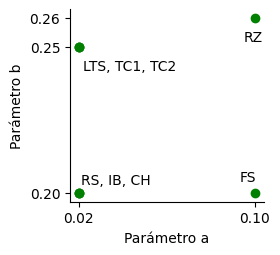

In [ ]:
# Parametros
a = np.array([0.02, 0.02, 0.02, 0.1, 0.02, 0.02, 0.1, 0.02]) #RS, IB, CH, FS, TC.1, TC.2, RZ, LTS
b = np.array([0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.26, 0.25])

# a vs b
plt.figure(figsize=(2.5,2.5))
plt.scatter(a,b, color='green', marker='o')

# Elimina los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Graficar las anotaciones
plt.annotate("RS, IB, CH", (a[0] + 0.001, b[0] + 0.003))
plt.annotate("FS", (a[3] - 0.007, b[3] + 0.004))
plt.annotate("LTS, TC1, TC2", (a[5] + 0.002, b[5] - 0.008))
plt.annotate("RZ", (a[6] - 0.005, b[6] - 0.008))
plt.xlabel('Parámetro a')
plt.ylabel('Parámetro b')
plt.xticks([0.02, 0.1])
plt.yticks([0.2, 0.25, 0.26])

# Quitar ejes
plt.show()

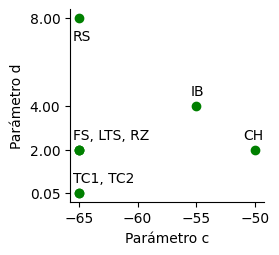

In [ ]:
c = np.array([-65, -55, -50, -65, -65, -65, -65, -65]) #RS, IB, CH, FS, TC.1, TC.2, RZ, LTS
d = np.array([8, 4, 2, 2, 0.05, 0.05, 2, 2])

# c vs d
plt.figure(figsize=(2.5,2.5))
plt.scatter(c,d, color='green')

# Elimina los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Graficar las anotaciones
plt.annotate("RS", (c[0] - 0.5, d[0] - 1))
plt.annotate("IB", (c[1] - 0.5, d[1] + 0.5))
plt.annotate("CH", (c[2] - 1, d[2] + 0.5))
plt.annotate("FS, LTS, RZ", (c[3] - 0.5 , d[3] + 0.5))
plt.annotate("TC1, TC2", (c[5] - 0.5, d[5] + 0.5))
plt.xlabel('Parámetro c')
plt.ylabel('Parámetro d')
plt.xticks([-65 ,-50, -55, -60])
plt.yticks([0.05, 2, 4, 8])

plt.show()

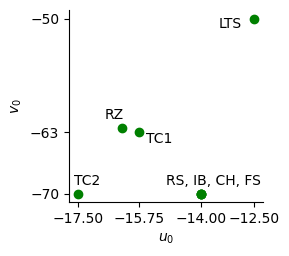

In [ ]:
# u0 y v0
v_0 = np.array([-70, -70, -70, -70, -63, -70, -62.5, -50]) #RS, IB, CH, FS, TC.1, TC.2, RZ, LTS
# b = np.array([0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.26, 0.25])
u_0 = b*v_0

# u0 vs v0
plt.figure(figsize=(2.5,2.5))
plt.scatter(u_0,v_0, color='green')

# Elimina los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Graficar las anotaciones
plt.annotate("RS, IB, CH, FS", (u_0[0] - 1, v_0[0] + 1))
plt.annotate("TC1", (u_0[4] + 0.2, v_0[4] - 1.2))
plt.annotate("TC2", (u_0[5] - 0.1, v_0[5] + 1))
plt.annotate("RZ", (u_0[6] - 0.5 , v_0[6] + 1))
plt.annotate("LTS", (u_0[7] - 1, v_0[7] - 1))
plt.xlabel(f'$u_0$')
plt.ylabel('$v_0$')

plt.xticks([-14, -15.75, -12.5, -17.5])
plt.yticks([-70, -63, -50])
plt.show()

**5)** Adapte el código en Matlab del paper de Izhikevich a código en Python.

**6)** Reproduzca la figura 3 del paper. Sugerencia, compartimentabilice el código en funciones, identificando las distintas componentes mencionadas en la teoría.

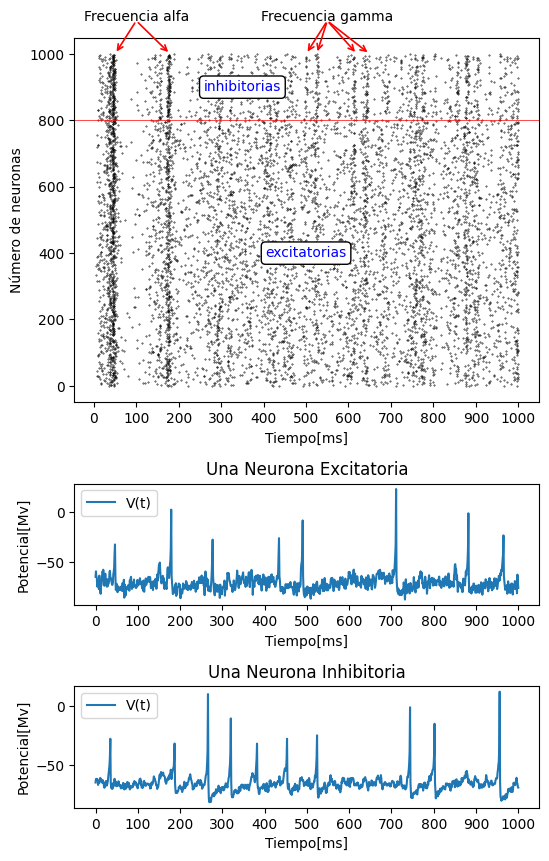

In [ ]:
# 5) Y 6)
# Condición de reseteo
def reseteo(x,j):
  if x>=30:
    return c[j]
  else:
    return x
# Parámetros de la red neuronal, 800 neuronas excitarorias y 200 inhibidoras
Ne = 800
Ni = 200

np.random.seed(107) #semilla para reproducir mismos datos
re = np.random.rand(Ne) #Ne números aleatorios de una distribución uniforme [0,1]
ri = np.random.rand(Ni)

# Parámetros        Neurona excitatorias / Neuronas Inhibitorias
a = np.concatenate((0.02 * np.ones(Ne), 0.02 + 0.08 * ri))
b = np.concatenate((0.2 * np.ones(Ne), 0.25 - 0.05 * ri))
c = np.concatenate((-65 + 15 * re ** 2, -65 * np.ones(Ni)))
d = np.concatenate((8 - 6 * re ** 2, 2 * np.ones(Ni)))
S = np.hstack((0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)))

# Condiciones iniciales
v = -65 * np.ones(Ne + Ni)
u = b * v

# Guardo los potenciales de membrana de la neurona 0 y 1000
v_0 = np.array([-65])
v_1000 = np.array([-65])

firings = [] #tiempo del spike

# Simulación de 1000 ms
for t in range(1, 1001):
    I = np.concatenate((5 * np.random.randn(Ne), 2 * np.random.randn(Ni))) #np.random.randn sigue una distribución normal N(0,1)
    fired = np.where(v >= 30)[0] #me devuelve los índice de v que tenga valores >= 30
    firings.extend(list(zip(t + 0 * fired, fired))) #t+0*fired es para que tenga las dimensiones de fired
    v[fired] = c[fired]
    u[fired] += d[fired]
    I += np.sum(S[:, fired[:Ne]], axis=1)
    # supuestamente se hace lo siguiente para estailidad en el error numérico
    v += 0.5 *(0.04 * v ** 2 + 5 * v + 140 - u + I)
    v += 0.5 * (0.04 * v ** 2 + 5 * v + 140 - u + I)
    v_0 = np.append(v_0, reseteo(v[0],0)) #guardo el potencia de umbral de la primera neurona excitatoria. Tiene reseteo.
    v_1000 = np.append(v_1000, reseteo(v[-1],-1)) #guardo el potencia de umbral de la última neurona inhibitoria. Tiene reseteo.
    #v += 0.04 * v ** 2 + 5 * v + 140 - u + I
    u += a * (b * v - u)

firings = np.array(firings)
# Graficar
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                                    figsize=(6, 10),
                                    gridspec_kw={'height_ratios': [3, 1, 1]})

# Establecer el espaciado vertical entre los subplots
fig.subplots_adjust(hspace=0.4)

# Ticks del eje X
x = range(0, 1001, 100)

#Gráfica de cúando se dispara cada neurona
ax1.plot(firings[:, 0], firings[:, 1], 'k.', markersize=0.7)
ax1.axhline(y=800, color='r', linewidth=0.5)
ax1.set_xlabel('Tiempo[ms]')
ax1.set_ylabel('Número de neuronas')
ax1.set_xticks(x)

# Etiquetas en el gráfico
texto = "excitatorias"
coord_x = 500  # Coordenada X
coord_y = 400   # Coordenada Y

# Agregar el cuadro de texto en el gráfico
ax1.text(coord_x, coord_y, texto, fontsize=10, color='blue', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

texto = "inhibitorias"
coord_x = 350  # Coordenada X
coord_y = 900   # Coordenada Y

# Agregar el cuadro de texto en el gráfico
ax1.text(coord_x, coord_y, texto, fontsize=10, color='blue', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Dibujar la flecha encima de los subplots
arrowprops = dict(arrowstyle='->', linewidth=1.2, color='red')
ax1.text(100, 1100, 'Frecuencia alfa', fontsize=10, ha='center')
ax1.annotate('', xy=(50, 1000), xytext=(100, 1100), arrowprops=arrowprops, fontsize=10, ha='center')
ax1.annotate('', xy=(180, 1000), xytext=(100, 1100), arrowprops=arrowprops, fontsize=10, ha='center')

ax1.text(550, 1100, 'Frecuencia gamma', fontsize=10, ha='center')
ax1.annotate('', xy=(525, 1000), xytext=(550, 1100), arrowprops=arrowprops, fontsize=10, ha='center')
ax1.annotate('', xy=(500, 1000), xytext=(550, 1100), arrowprops=arrowprops, fontsize=10, ha='center')
ax1.annotate('', xy=(620, 1000), xytext=(550, 1100), arrowprops=arrowprops, fontsize=10, ha='center')
ax1.annotate('', xy=(650, 1000), xytext=(550, 1100), arrowprops=arrowprops, fontsize=10, ha='center')

# Gráfica del potencial de una neurona excitatoria con los parámetros anteriores aproximados
t = np.arange(0, 1001)
ax2.set_title('Una Neurona Excitatoria')
ax2.plot(t,v_0, label='V(t)')
ax2.set_ylabel('Potencial[Mv]')
ax2.set_xlabel('Tiempo[ms]')
ax2.set_xticks(x)
ax2.legend()

# Gráfica del potencial de una neurona inhibitoria con los parámetros anteriores aproximados
ax3.set_title('Una Neurona Inhibitoria')
ax3.plot(t,v_1000, label='V(t)')
ax3.set_ylabel('Potencial[Mv]')
ax3.set_xlabel('Tiempo[ms]')
ax3.set_xticks(x)
ax3.legend()

plt.show()